In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
ex = pd.read_csv("C:\\Users\\yfawz\\OneDrive\\Desktop\\Datasets\\Lending Club\\lending-club-loan-data\\loan.csv", low_memory=False)

In [3]:
ex.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ex.isnull().sum()*100/len(ex)

id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       7.385826
emp_length                                      6.498389
home_ownership                                  0.000000
annual_inc                                      0.000177
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

There are a lot of columns with a significant amount of null values. We will drop any column that has >80% of values being null.

In [24]:
df = ex

In [46]:
for col in df.columns:
    if (df[col].isnull().sum())/len(ex) > 0.8:
        df.drop(col, axis=1, inplace=True)
    else:
        pass

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 106 entries, loan_amnt to debt_settlement_flag
dtypes: float64(79), int64(4), object(23)
memory usage: 1.8+ GB


In [55]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=106)

In [73]:
df[df.columns[0:20]].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD


In [74]:
df[df.columns[20:40]].head()

,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
0,18.24,0.0,Apr-2001,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0
1,26.52,0.0,Jun-1987,0.0,71.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0
2,10.51,0.0,Apr-2011,0.0,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0
3,16.74,0.0,Feb-2006,0.0,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0
4,26.35,0.0,Dec-2000,0.0,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0


In [75]:
df[df.columns[40:60]].head()

,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m
0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0
1,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0
2,Feb-2019,180.69,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0
3,Feb-2019,146.51,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0.0,686.0,305049.0,1.0,5.0,3.0,5.0,5.0,30683.0,68.0,0.0,0.0
4,Feb-2019,731.78,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0.0,0.0,116007.0,3.0,5.0,3.0,5.0,4.0,28845.0,89.0,2.0,4.0


In [76]:
df[df.columns[60:80]].head()

,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq
0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0
1,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0
2,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,NaN,14.0
3,3761.0,70.0,7000.0,2.0,4.0,3.0,5.0,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,NaN,5.0
4,516.0,54.0,23100.0,1.0,0.0,0.0,9.0,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,NaN,13.0


In [77]:
df[df.columns[80:]].head()

,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,NaN,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,NaN,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [89]:
df.hardship_flag.value_counts(normalize=True)*100

N    99.960852
Y     0.039148
Name: hardship_flag, dtype: float64

In [90]:
df.debt_settlement_flag.value_counts(normalize=True)*100

N    98.537777
Y     1.462223
Name: debt_settlement_flag, dtype: float64

In [ ]:
hard_vs_debt_flag = df[['hardship_flag','debt_settlement_flag']]

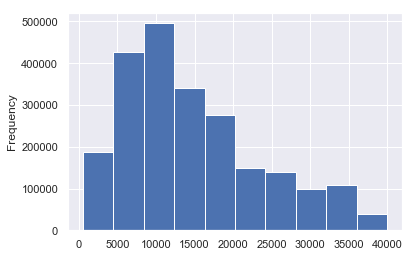

In [23]:
ex.funded_amnt.plot.hist()

In [29]:
loan_vs_funded = ex.loan_amnt - ex.funded_amnt

In [32]:
loan_vs_funded[loan_vs_funded!=0]

626756      8000
626798     10000
627007     10000
1725898     1600
1726770       25
1763373      100
1767621      100
1768332       25
1768475       25
1796397     3850
1825868     9475
1841111    12100
1841113     7450
1841126    11125
1845142     7350
1845143     8325
1845146     5225
1845149     3525
1845152     3450
1845155     9425
1845157    12850
1845165     3625
1845166     2725
1845169     3575
1845172     7075
1845175     6100
1845178     9725
1845187     2125
1845188     6375
1845190     8475
           ...  
2141166     5800
2141171     5000
2141175     4000
2141180     4000
2141183    15000
2141187     6000
2141202     5000
2141205     7000
2141210     7000
2141221     7750
2141237     2550
2141257     8050
2141508     8000
2141615     5000
2141664     5000
2141669     3400
2141698    11000
2141721     6000
2141722     7000
2141736     5000
2141763     6000
2141808     6700
2141855    11925
2141861     8125
2141872     5750
2141947    15450
2141948    11250
2141979     21

In [30]:
non_zero_l_vs_f = {}
for val in list(loan_vs_funded.values):
    if val>0:
        non_zero_l_vs_f[str(list(loan_vs_funded.values).index(val))] = val
    else:
        pass

KeyboardInterrupt: 

It seems that the id, member_id columns and 'url' are full of Nan values and are not needed in our analysis, so we will drop them for the final database.

In [28]:
finaldf = ex.drop(['member_id','id','url','desc'], axis=1)

In [74]:
list(loan_vs_funded.values).index(0)

0

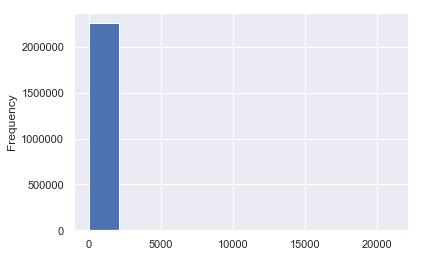

In [99]:
loan_vs_funded.plot(kind='hist', bins=10)